# Hotel Booking Demand Analysis
## Project 1: Data Cleaning and Exploratory Data Analysis (EDA)

**Author:** Mir Musaib  
**Dataset Source:** Kaggle – Hotel Booking Demand  
**Objective:** The goal of this notebook is to clean a real-world hotel booking dataset and
perform exploratory data analysis (EDA) to extract meaningful insights using
visualizations.


## 📌 Project Overview

This project focuses on analyzing hotel booking data for city and resort hotels.
The dataset contains information related to booking dates, customer details,
room preferences, cancellations, and stay duration.

### Key Tasks:
- Data inspection and cleaning
- Handling missing values
- Feature understanding
- Exploratory Data Analysis (EDA)
- Visualization-driven insights

This project demonstrates practical data cleaning techniques, feature
engineering, and visualization-driven analysis.

## 🧰 Importing Required Libraries

### Goal:
To load Python libraries required for data manipulation, numerical analysis,
and data visualization.


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")


## 📂 Loading the Dataset

### Goal:
To load the hotel booking dataset into a Pandas DataFrame and preview the data.


In [72]:
df = pd.read_csv("hotel_bookings.csv")
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## 🔍 Initial Data Inspection

### Goal:
To understand the dataset structure, size, column names, data types,
and initial statistics.


In [73]:
print(df.shape)
df.info()
df.describe()

(119390, 32)
<class 'pandas.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  str    
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  str    
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal          

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## 🧹 Missing Value Analysis

### Goal:
To identify columns containing missing values and assess how much data
needs cleaning.


In [74]:
df.isnull().sum().sort_values(ascending=False)
df.select_dtypes(include=["number"]).isnull().sum()



is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
agent                              16340
company                           112593
days_in_waiting_list                   0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
dtype: int64

## 🧼 Handling Missing Values

### Goal:
To treat missing values using logical assumptions while preserving
maximum information.


In [75]:
df["children"] = df["children"].fillna(df["children"].mode()[0])
df["agent"] = df["agent"].fillna(df["agent"].mode()[0])
df["company"] = df["company"].fillna(df["company"].mode()[0])

# keep country as categorical handling
df["country"] = df["country"].fillna("Unknown")



## 🔄 Data Type Correction

### Goal:
To ensure numerical and categorical columns have appropriate data types
for accurate analysis.

To identify all columns containing date-related information and convert them
into proper datetime format for accurate time-based analysis.


In [88]:
df["children"] = df["children"].astype(int)
df["agent"] = df["agent"].astype(int)
df["company"] = df["company"].astype(int)

df.info()
df.to_csv("Clean.csv")

date_cols = ["reservation_status_date", "arrival_date_year","arrival_date_month","arrival_date_day_of_month"]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors="coerce")
df.columns


<class 'pandas.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  str           
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  datetime64[ns]
 4   arrival_date_month              119390 non-null  datetime64[us]
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  datetime64[ns]
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119390 non-null  int64         
 11

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='str')

## 1. 🏨 Booking Distribution by Hotel Type

### Goal
To understand the proportion of bookings between city hotels and resort hotels.


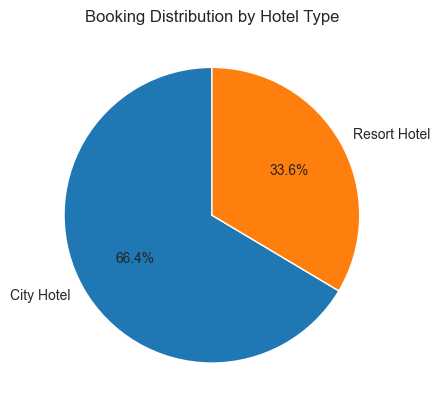

In [ ]:
hotel_counts = df["hotel"].value_counts()

plt.pie(
    hotel_counts,
    labels=hotel_counts.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Booking Distribution by Hotel Type")
plt.show()
plt.show()


### 🏨 Booking Distribution by Hotel Type
**Question it answers:** Which hotel type receives more bookings?  
**Insight:** City hotels receive a larger share of bookings compared to resort hotels.


## 2. ❌ Booking Cancellation Analysis

### Goal:
To understand the proportion of canceled versus non-canceled bookings.


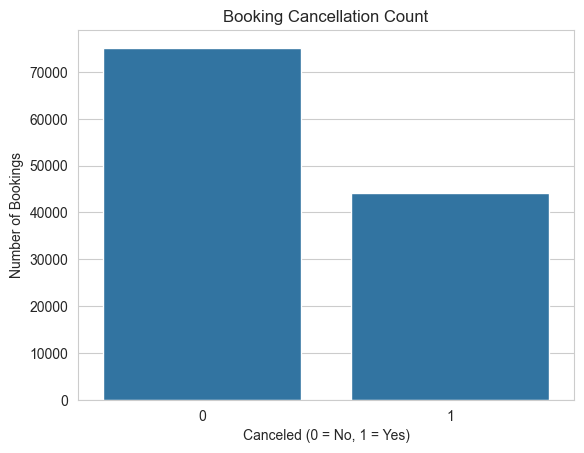

In [ ]:
sns.countplot(x="is_canceled", data=df)
plt.title("Booking Cancellation Count")
plt.xlabel("Canceled (0 = No, 1 = Yes)")
plt.ylabel("Number of Bookings")
plt.show()


### ❌ Booking Cancellation Proportion
**Question it answers:** What proportion of hotel bookings are canceled?  
**Insight:** A significant portion of bookings are canceled, indicating demand uncertainty.


## 3. 📅 Monthly Booking Trends

### Goal:
To analyze how hotel bookings vary across different months of the year.


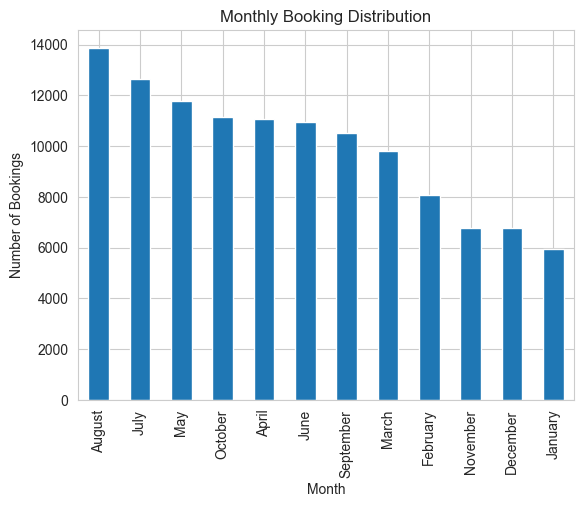

In [ ]:
df["arrival_date_month"].value_counts().plot(kind="bar")
plt.title("Monthly Booking Distribution")
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.show()


### 📅 Monthly Booking Trends
**Question it answers:** During which months do hotel bookings peak?  
**Insight:** Bookings peak during mid-year months, reflecting strong seasonal demand.


## 4. 🔥 Correlation Analysis

### Goal:
To study relationships between numerical variables and identify key factors
influencing booking behavior.


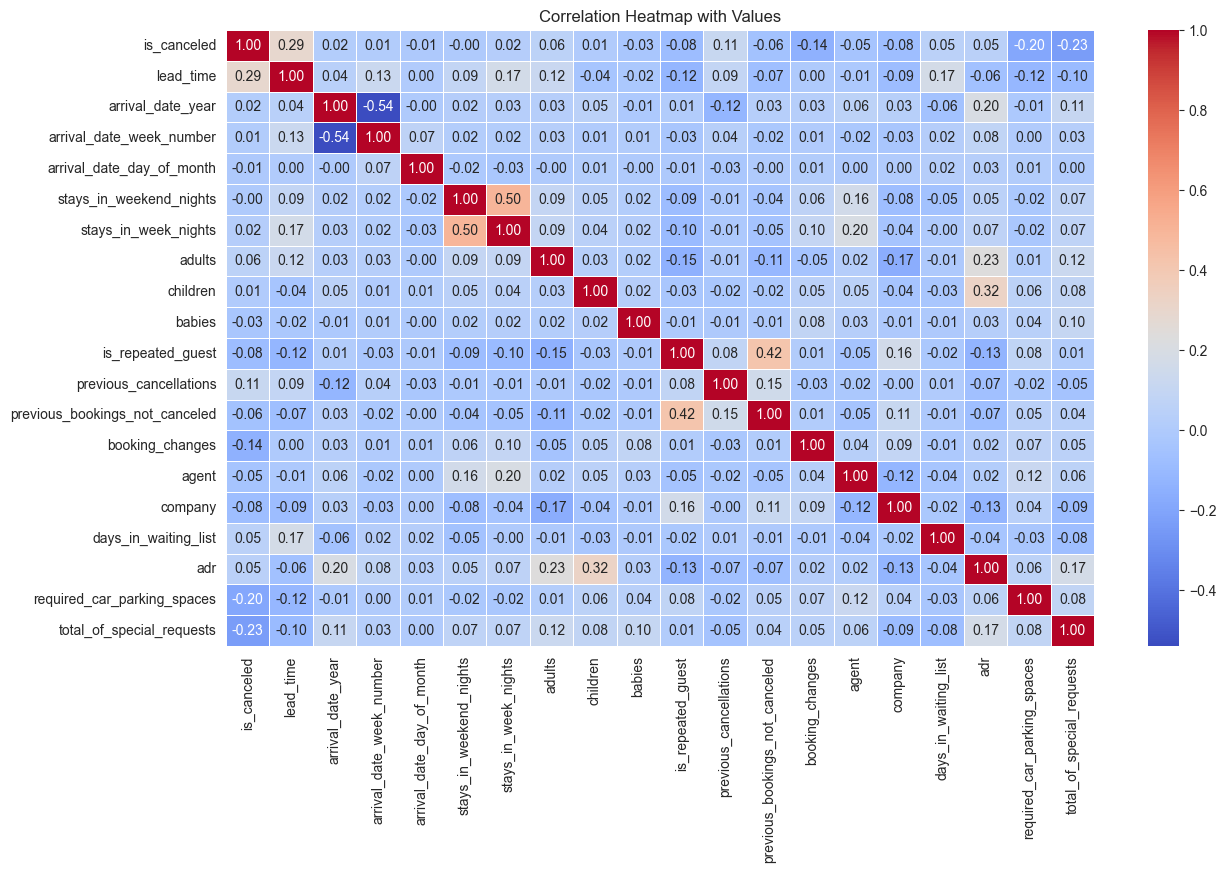

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Heatmap with Values")
plt.show()



### 🔥 Correlation Heatmap
**Question it answers:** Which numerical features are strongly related to each other?  
**Insight:** Stay duration and guest-related features show strong correlations, while pricing shows weaker relationships.


## 5. 🎻 Lead Time vs Booking Cancellation

### Goal:
To analyze the relationship between lead time and booking cancellations by
comparing the distribution of lead time for canceled and non-canceled bookings.

This visualization helps determine whether bookings made far in advance are
more likely to be canceled.


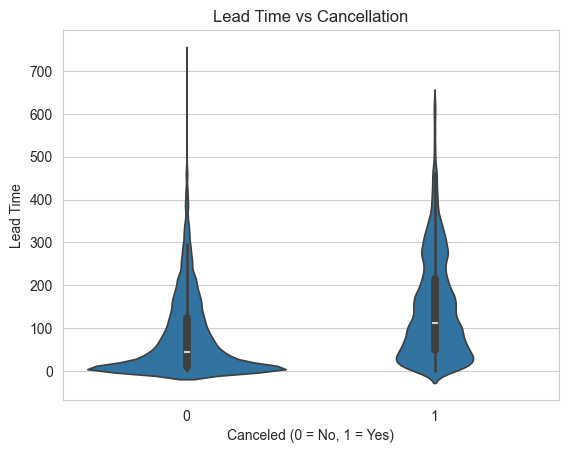

In [ ]:
sns.violinplot(x="is_canceled", y="lead_time", data=df)
plt.title("Lead Time vs Cancellation")
plt.xlabel("Canceled (0 = No, 1 = Yes)")
plt.ylabel("Lead Time")
plt.show()

### 🎻 Lead Time vs Booking Cancellation
**Question it answers:** Does lead time influence booking cancellations?  
**Insight:** Bookings made far in advance tend to have a higher likelihood of cancellation.

## 6. 👨‍👩‍👧 Guest Composition Analysis

### Goal:
To analyze the number of adults, children, and babies per booking.


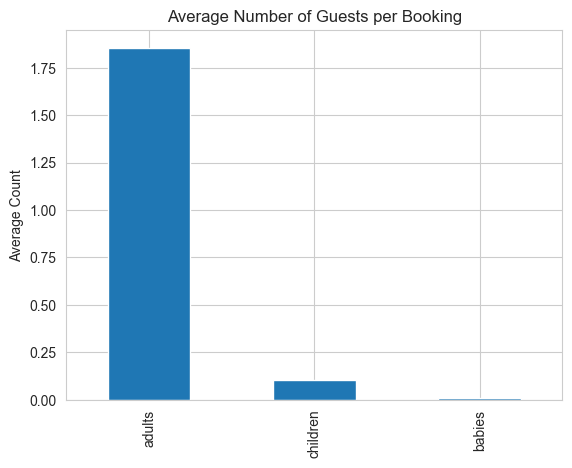

In [ ]:
guest_avg = df[["adults", "children", "babies"]].mean()

guest_avg.plot(kind="bar")
plt.title("Average Number of Guests per Booking")
plt.ylabel("Average Count")
plt.show()


### 👨‍👩‍👧 Guest Composition Analysis
**Question it answers:** What is the typical guest composition per booking?  
**Insight:** Most bookings consist primarily of adult guests, with fewer family or child bookings.


## 📝 Final Insights and Conclusion

Based on the data cleaning and exploratory data analysis performed on the Hotel
Booking Demand dataset, several meaningful insights were obtained.

City hotels receive a higher number of bookings compared to resort hotels,
indicating stronger demand in urban locations. A significant proportion of
bookings are canceled, highlighting the importance of understanding customer
behavior and cancellation patterns. Seasonal trends are clearly visible, with
booking volumes peaking during mid-year months, which suggests higher travel
demand during these periods.

Correlation analysis shows strong relationships among stay duration and guest-
related features, while pricing-related variables exhibit weaker correlations.
Additionally, bookings made well in advance tend to have a higher likelihood of
cancellation, suggesting that longer lead times increase uncertainty. Guest
composition analysis reveals that most bookings are dominated by adult travelers,
with relatively fewer family or child-inclusive reservations.

Overall, this project demonstrates how effective data cleaning and exploratory
data analysis can transform raw data into actionable insights, supporting better
decision-making in the hospitality industry.
